In [1]:
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
src_base_w = 32
src_base_h = 32
iso_base_w = 64
iso_base_h = 32

In [3]:
im_v = Image.open('landh-tiles/landh_tiles.png')
rgb_im_v = im_v.convert('RGBA')

cols_im_v = set()
grey_im_v = set()
for sy in range(rgb_im_v.size[1]):
	for sx in range(rgb_im_v.size[0]):
		c = r, g, b, a = rgb_im_v.getpixel((sx, sy))
		cols_im_v.add(c)
		grey_im_v.add((r + g + b) // 3)
print(cols_im_v)
print(sorted(grey_im_v))

{(28, 28, 28, 255), (198, 198, 198, 255), (85, 85, 85, 255), (113, 113, 113, 255), (0, 0, 0, 255), (255, 255, 255, 255), (142, 142, 142, 255), (170, 170, 170, 255), (57, 57, 57, 255), (227, 227, 227, 255)}
[0, 28, 57, 85, 113, 142, 170, 198, 227, 255]


(800, 576)
0.72


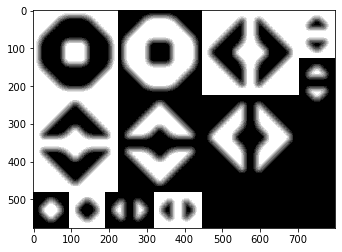

In [4]:
im = Image.open('landh-tiles/landh_tiles.png')
rgb_im = im.convert('RGBA')

print(rgb_im.size)
print(rgb_im.height / rgb_im.width)

plt.imshow(im)
plt.show()

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def bezier_gradient(ref_colors, output_num=100):
    n_ref = len(ref_colors) - 1

    fact_cache = {}
    def fact(n):
        ''' Memorized factorial function '''
        try:
            return fact_cache[n]
        except(KeyError):
            if n == 1 or n == 0:
                result = 1
            else:
                result = n*fact(n-1)
            fact_cache[n] = result
            return result

    def bernstein(t, n, i):
        ''' Bernstein coefficient '''
        binom = fact(n)/float(fact(i)*fact(n - i))
        return binom*((1-t)**(n-i))*(t**i)

    def bezier_interp(t):
            ''' Define an interpolation function
                for this specific curve'''
            # List of all summands
            summands = [
                list(map(lambda x: int(bernstein(t, n_ref, i)*x), c)) for i, c in enumerate(ref_colors)
            ]

            # Output color
            out = [0,0,0]
            # Add components of each summand together
            for vector in summands:
                for c in range(3):
                    out[c] += vector[c]

            return out

    gradient = [
        bezier_interp(float(t)/(output_num-1)) for t in range(output_num)
    ]
    return gradient

In [41]:
ref_colors = [(0,0,255), (0, 230, 64), (255, 203, 5)]

print(ref_colors)
num_colors = 256 // 16

gradient = bezier_gradient(ref_colors, num_colors)
print(gradient)

[(0, 0, 255), (0, 230, 64), (255, 203, 5)]
[[0, 0, 255], [1, 28, 229], [4, 56, 205], [10, 81, 183], [18, 103, 162], [28, 124, 141], [40, 142, 121], [55, 158, 104], [72, 171, 87], [91, 183, 71], [113, 192, 58], [137, 198, 45], [163, 202, 33], [191, 205, 21], [222, 204, 12], [255, 203, 5]]


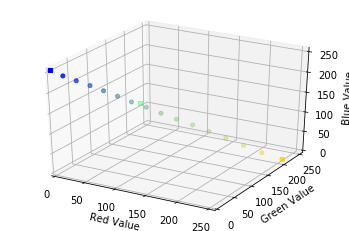

In [42]:
def hex_to_RGB(hex):
    ''' "#FFFFFF" -> [255,255,255] '''
    # Pass 16 to the integer function for change of base
    return [int(hex[i:i+2], 16) for i in range(1,6,2)]


def RGB_to_hex(RGB):
    ''' [255,255,255] -> "#FFFFFF" '''
    # Components need to be integers for hex to make sense
    RGB = [int(x) for x in RGB]
    return "#"+"".join(["0{0:x}".format(v) if v < 16 else
                        "{0:x}".format(v) for v in RGB])

def color_dict(gradient):
    ''' Takes in a list of RGB sub-lists and returns dictionary of
        colors in RGB and hex form for use in a graphing function
        defined later on '''
    return {"hex": [RGB_to_hex(RGB) for RGB in gradient],
            "r":   [RGB[0] for RGB in gradient],
            "g":   [RGB[1] for RGB in gradient],
            "b":   [RGB[2] for RGB in gradient]}

def control_points_from_colors(gradient):
    return {"hex": [RGB_to_hex(RGB) for RGB in gradient],
            "r":   [RGB[0] for RGB in gradient],
            "g":   [RGB[1] for RGB in gradient],
            "b":   [RGB[2] for RGB in gradient]}

def plot_gradient_series(color_dict, pointsize=100, control_points=None, filename=None):
        ''' Take a dictionary containing the color
            gradient in RBG and hex form and plot
            it to a 3D matplotlib device '''

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        xcol = color_dict["r"]
        ycol = color_dict["g"]
        zcol = color_dict["b"]

        # If bezier control points passed to function,
        # plot along with curve
        if control_points != None:
            xcntl = control_points["r"]
            ycntl = control_points["g"]
            zcntl = control_points["b"]
            ax.scatter( xcntl, ycntl, zcntl,
                        c=control_points["hex"],
                        s=pointsize, marker='s')

        # We can pass a vector of colors corresponding to each point
        ax.scatter(xcol, ycol, zcol, c=color_dict["hex"], s=pointsize)

        ax.set_xlabel('Red Value')
        ax.set_ylabel('Green Value')
        ax.set_zlabel('Blue Value')
        ax.set_zlim3d(0,255)
        plt.ylim(0,255)
        plt.xlim(0,255)

        if not filename is None:
            # Save two views of each plot
            ax.view_init(elev=15, azim=68)
            plt.savefig(filename + ".svg")
            ax.view_init(elev=15, azim=28)
            plt.savefig(filename + "_view_2.svg")

        # Show plot for testing
        plt.show()

plot_gradient_series(color_dict(gradient),
                     pointsize=num_colors,
                     control_points=control_points_from_colors(ref_colors)
                    )

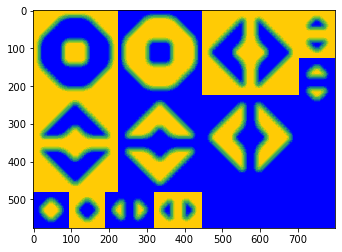

In [43]:
pixels = rgb_im.load()
max_x, max_y = rgb_im.size

for y in range(max_y):
	for x in range(max_x):
		r, g, b, a = rgb_im_v.getpixel((x, y))
		v = (r + g + b) // 3 // 16
		r, g, b = gradient[v]
		pixels[x, y] = (r, g, b, 255)

plt.imshow(rgb_im)
plt.show()

In [44]:
import csv

tiles_info = []
with open('landh-tiles/landh_tiles.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        tiles_info.append(row)
        line_count += 1
    print(f'Processed {line_count} lines.')
    print(f'Found {len(tiles_info)} tiles.')


Column names are TileName, XCoord, YCoord, SolidFlags, EdgeUp, EdgeDown, EdgeLeft, EdgeRight, Fill, Comment
Processed 105 lines.
Found 104 tiles.


In [45]:
def convert_coords(x, y, hpos, vpos):
	hoff = src_base_w * hpos
	voff = src_base_h * vpos
	x = max(0, min(iso_base_w - 1, x))
	y = max(0, min(iso_base_h - 1, y))
	u = (2 * x - iso_base_w) / iso_base_w
	v = (2 * y - iso_base_h) / iso_base_h
	r = max(-1, min(1, u - v))
	s = max(-1, min(1, u + v))
	sx = max(0, min(src_base_w - 1, (r + 1) * src_base_w / 2)) + hoff
	sy = max(0, min(src_base_h - 1, (s + 1) * src_base_h / 2)) + voff
	rv, gv, bv, av = rgb_im_v.getpixel((sx, sy))
	v = int(iso_base_h * (rv + gv + bv) / (3 * 255) / 2)
	return sx, sy, v

def convert_tile(hpos, vpos):
	img = Image.new( 'RGBA', (iso_base_w, iso_base_h * 2), (0, 0, 0, 0))
	pixels = img.load()
	for y in range(img.size[1]):
		for x in range(img.size[0]):
			if abs((iso_base_w - 1) / 2 - x) < (iso_base_h + 1) - abs(iso_base_h - 1 -2*y):
				sx, sy, v = convert_coords(x, y, hpos, vpos)
				r, g, b, a = rgb_im.getpixel((sx, sy))
				r, g, b = int(r * .8), int(g * .8), int(b * .8)
				for i in range(0, v):
					pixels[x, iso_base_h + y - i] = (int(r/2), int(g/2), int(b/2), 255)
				pixels[x, iso_base_h + y - v] = (r, g, b, 255)
	return img

OrderedDict([('TileName', 'A1'), ('XCoord', '10'), ('YCoord', '3'), ('SolidFlags', 'BE+BEU+BED+BER+BEL'), ('EdgeUp', 'EMPTY'), ('EdgeDown', 'EMPTY'), ('EdgeLeft', 'EMPTY'), ('EdgeRight', 'EMPTY'), ('Fill', '0'), ('Comment', 'Standard')])


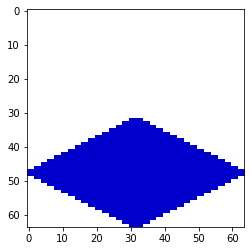

OrderedDict([('TileName', 'A2'), ('XCoord', '3'), ('YCoord', '3'), ('SolidFlags', 'BS+BSU+BSD+BSR+BSL'), ('EdgeUp', 'SOLID'), ('EdgeDown', 'SOLID'), ('EdgeLeft', 'SOLID'), ('EdgeRight', 'SOLID'), ('Fill', '100'), ('Comment', 'Standard')])


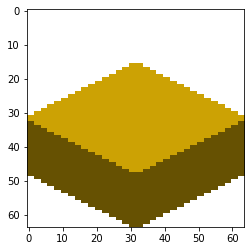

OrderedDict([('TileName', 'B1'), ('XCoord', '10'), ('YCoord', '4'), ('SolidFlags', 'BEU+BSD'), ('EdgeUp', 'EMPTY'), ('EdgeDown', 'SOLID'), ('EdgeLeft', 'HALF_DOWN'), ('EdgeRight', 'HALF_DOWN'), ('Fill', '50'), ('Comment', 'Standard')])


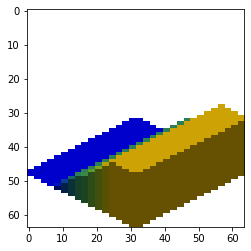

OrderedDict([('TileName', 'B2'), ('XCoord', '9'), ('YCoord', '3'), ('SolidFlags', 'BER+BSL'), ('EdgeUp', 'HALF_LEFT'), ('EdgeDown', 'HALF_LEFT'), ('EdgeLeft', 'SOLID'), ('EdgeRight', 'EMPTY'), ('Fill', '50'), ('Comment', 'Standard')])


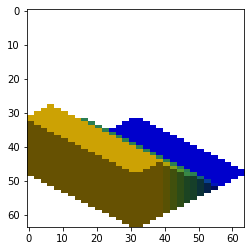

OrderedDict([('TileName', 'B3'), ('XCoord', '10'), ('YCoord', '2'), ('SolidFlags', 'BED+BSU'), ('EdgeUp', 'SOLID'), ('EdgeDown', 'EMPTY'), ('EdgeLeft', 'HALF_UP'), ('EdgeRight', 'HALF_UP'), ('Fill', '50'), ('Comment', 'Standard')])


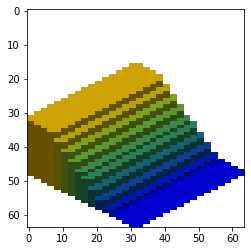

OrderedDict([('TileName', 'B4'), ('XCoord', '11'), ('YCoord', '3'), ('SolidFlags', 'BEL+BSR'), ('EdgeUp', 'HALF_RIGHT'), ('EdgeDown', 'HALF_RIGHT'), ('EdgeLeft', 'EMPTY'), ('EdgeRight', 'SOLID'), ('Fill', '50'), ('Comment', 'Standard')])


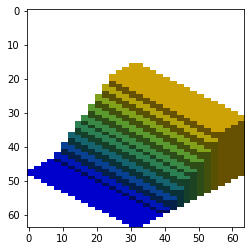

OrderedDict([('TileName', 'C11'), ('XCoord', '2'), ('YCoord', '2'), ('SolidFlags', 'BEU+BEL'), ('EdgeUp', 'EMPTY'), ('EdgeDown', 'HALF_RIGHT'), ('EdgeLeft', 'EMPTY'), ('EdgeRight', 'HALF_DOWN'), ('Fill', '25'), ('Comment', 'Standard')])


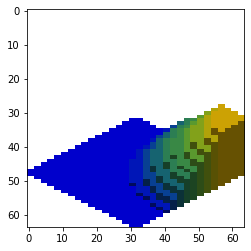

OrderedDict([('TileName', 'C12'), ('XCoord', '4'), ('YCoord', '2'), ('SolidFlags', 'BEU+BER'), ('EdgeUp', 'EMPTY'), ('EdgeDown', 'HALF_LEFT'), ('EdgeLeft', 'HALF_DOWN'), ('EdgeRight', 'EMPTY'), ('Fill', '25'), ('Comment', 'Standard')])


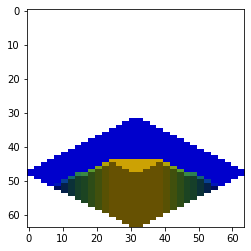

OrderedDict([('TileName', 'C13'), ('XCoord', '4'), ('YCoord', '4'), ('SolidFlags', 'BED+BER'), ('EdgeUp', 'HALF_LEFT'), ('EdgeDown', 'EMPTY'), ('EdgeLeft', 'HALF_UP'), ('EdgeRight', 'EMPTY'), ('Fill', '25'), ('Comment', 'Standard')])


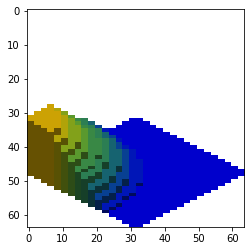

OrderedDict([('TileName', 'C14'), ('XCoord', '2'), ('YCoord', '4'), ('SolidFlags', 'BED+BEL'), ('EdgeUp', 'HALF_RIGHT'), ('EdgeDown', 'EMPTY'), ('EdgeLeft', 'EMPTY'), ('EdgeRight', 'HALF_UP'), ('Fill', '25'), ('Comment', 'Standard')])


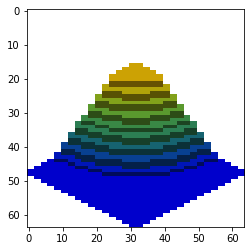

OrderedDict([('TileName', 'C21'), ('XCoord', '9'), ('YCoord', '2'), ('SolidFlags', 'BSU+BSL'), ('EdgeUp', 'SOLID'), ('EdgeDown', 'HALF_LEFT'), ('EdgeLeft', 'SOLID'), ('EdgeRight', 'HALF_UP'), ('Fill', '75'), ('Comment', 'Standard')])


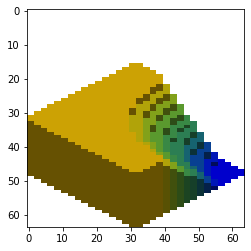

OrderedDict([('TileName', 'C22'), ('XCoord', '11'), ('YCoord', '2'), ('SolidFlags', 'BSU+BSR'), ('EdgeUp', 'SOLID'), ('EdgeDown', 'HALF_RIGHT'), ('EdgeLeft', 'HALF_UP'), ('EdgeRight', 'SOLID'), ('Fill', '75'), ('Comment', 'Standard')])


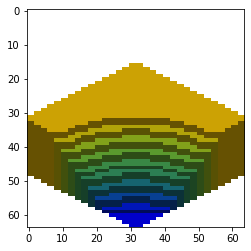

OrderedDict([('TileName', 'C23'), ('XCoord', '11'), ('YCoord', '4'), ('SolidFlags', 'BSD+BSR'), ('EdgeUp', 'HALF_RIGHT'), ('EdgeDown', 'SOLID'), ('EdgeLeft', 'HALF_DOWN'), ('EdgeRight', 'SOLID'), ('Fill', '75'), ('Comment', 'Standard')])


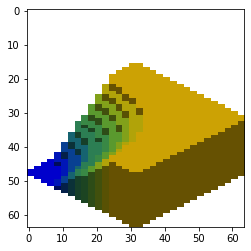

OrderedDict([('TileName', 'C24'), ('XCoord', '9'), ('YCoord', '4'), ('SolidFlags', 'BSD+BSL'), ('EdgeUp', 'HALF_LEFT'), ('EdgeDown', 'SOLID'), ('EdgeLeft', 'SOLID'), ('EdgeRight', 'HALF_DOWN'), ('Fill', '75'), ('Comment', 'Standard')])


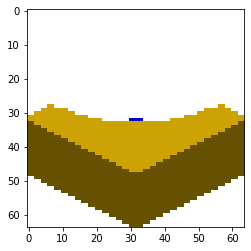

OrderedDict([('TileName', 'D11'), ('XCoord', '9'), ('YCoord', '0'), ('SolidFlags', 'BSD+BEU'), ('EdgeUp', 'EMPTY'), ('EdgeDown', 'SCOR_LEFTN'), ('EdgeLeft', 'ECOR_DOWNN'), ('EdgeRight', 'HALF_DOWN'), ('Fill', '35'), ('Comment', 'Open Corners')])


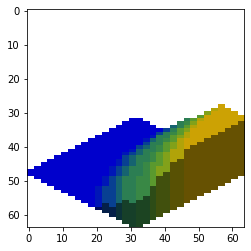

OrderedDict([('TileName', 'D12'), ('XCoord', '11'), ('YCoord', '0'), ('SolidFlags', 'BSD+BEU'), ('EdgeUp', 'EMPTY'), ('EdgeDown', 'SCOR_RIGHTN'), ('EdgeLeft', 'HALF_DOWN'), ('EdgeRight', 'ECOR_DOWNN'), ('Fill', '35'), ('Comment', 'Open Corners')])


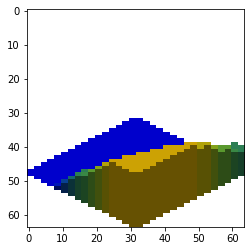

OrderedDict([('TileName', 'D13'), ('XCoord', '13'), ('YCoord', '2'), ('SolidFlags', 'BSL+BER'), ('EdgeUp', 'ECOR_LEFTN'), ('EdgeDown', 'HALF_LEFT'), ('EdgeLeft', 'SCOR_UPN'), ('EdgeRight', 'EMPTY'), ('Fill', '35'), ('Comment', 'Open Corners')])


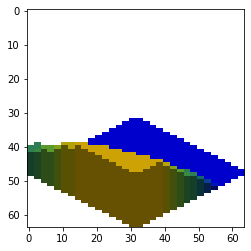

OrderedDict([('TileName', 'D14'), ('XCoord', '13'), ('YCoord', '4'), ('SolidFlags', 'BSL+BER'), ('EdgeUp', 'HALF_LEFT'), ('EdgeDown', 'ECOR_LEFTN'), ('EdgeLeft', 'SCOR_DOWNN'), ('EdgeRight', 'EMPTY'), ('Fill', '35'), ('Comment', 'Open Corners')])


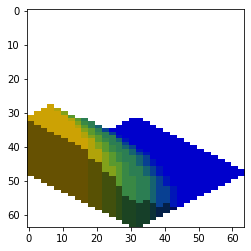

OrderedDict([('TileName', 'D15'), ('XCoord', '11'), ('YCoord', '6'), ('SolidFlags', 'BSU+BED'), ('EdgeUp', 'SCOR_RIGHTN'), ('EdgeDown', 'EMPTY'), ('EdgeLeft', 'HALF_UP'), ('EdgeRight', 'ECOR_UPN'), ('Fill', '35'), ('Comment', 'Open Corners')])


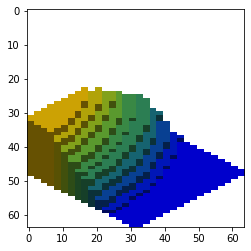

OrderedDict([('TileName', 'D16'), ('XCoord', '9'), ('YCoord', '6'), ('SolidFlags', 'BSU+BED'), ('EdgeUp', 'SCOR_LEFTN'), ('EdgeDown', 'EMPTY'), ('EdgeLeft', 'ECOR_UPN'), ('EdgeRight', 'HALF_UP'), ('Fill', '35'), ('Comment', 'Open Corners')])


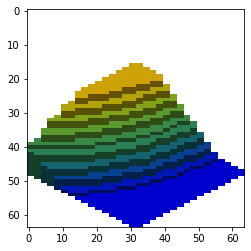

OrderedDict([('TileName', 'D17'), ('XCoord', '7'), ('YCoord', '4'), ('SolidFlags', 'BSR+BEL'), ('EdgeUp', 'HALF_RIGHT'), ('EdgeDown', 'ECOR_RIGHTN'), ('EdgeLeft', 'EMPTY'), ('EdgeRight', 'SCOR_DOWNN'), ('Fill', '35'), ('Comment', 'Open Corners')])


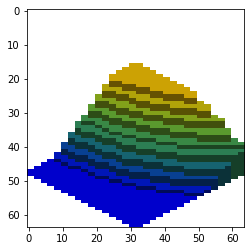

OrderedDict([('TileName', 'D18'), ('XCoord', '7'), ('YCoord', '2'), ('SolidFlags', 'BSR+BEL'), ('EdgeUp', 'ECOR_RIGHTN'), ('EdgeDown', 'HALF_RIGHT'), ('EdgeLeft', 'EMPTY'), ('EdgeRight', 'SCOR_UPN'), ('Fill', '35'), ('Comment', 'Open Corners')])


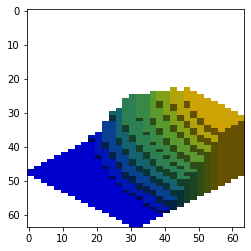

OrderedDict([('TileName', 'D21'), ('XCoord', '2'), ('YCoord', '0'), ('SolidFlags', 'BED+BSU'), ('EdgeUp', 'SOLID'), ('EdgeDown', 'ECOR_LEFTN'), ('EdgeLeft', 'SCOR_DOWNN'), ('EdgeRight', 'HALF_UP'), ('Fill', '65'), ('Comment', 'Open Corners')])


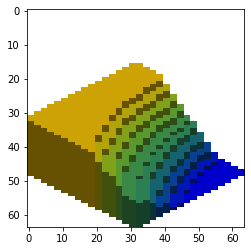

OrderedDict([('TileName', 'D22'), ('XCoord', '4'), ('YCoord', '0'), ('SolidFlags', 'BED+BSU'), ('EdgeUp', 'SOLID'), ('EdgeDown', 'ECOR_RIGHTN'), ('EdgeLeft', 'HALF_UP'), ('EdgeRight', 'SCOR_UPN'), ('Fill', '65'), ('Comment', 'Open Corners')])


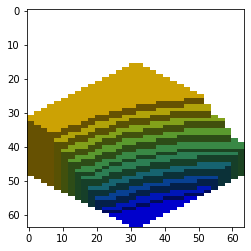

OrderedDict([('TileName', 'D23'), ('XCoord', '6'), ('YCoord', '2'), ('SolidFlags', 'BEL+BSR'), ('EdgeUp', 'SCOR_LEFTN'), ('EdgeDown', 'HALF_RIGHT'), ('EdgeLeft', 'ECOR_UPN'), ('EdgeRight', 'SOLID'), ('Fill', '65'), ('Comment', 'Open Corners')])


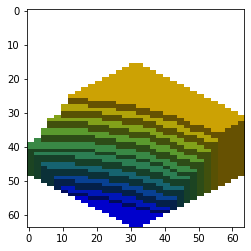

OrderedDict([('TileName', 'D24'), ('XCoord', '6'), ('YCoord', '4'), ('SolidFlags', 'BEL+BSR'), ('EdgeUp', 'HALF_RIGHT'), ('EdgeDown', 'SCOR_LEFTN'), ('EdgeLeft', 'ECOR_DOWNN'), ('EdgeRight', 'SOLID'), ('Fill', '65'), ('Comment', 'Open Corners')])


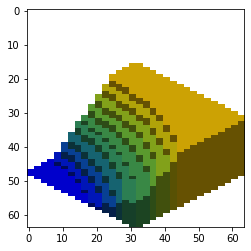

OrderedDict([('TileName', 'D25'), ('XCoord', '4'), ('YCoord', '6'), ('SolidFlags', 'BEU+BSD'), ('EdgeUp', 'ECOR_RIGHTN'), ('EdgeDown', 'SOLID'), ('EdgeLeft', 'HALF_DOWN'), ('EdgeRight', 'SCOR_UPN'), ('Fill', '65'), ('Comment', 'Open Corners')])


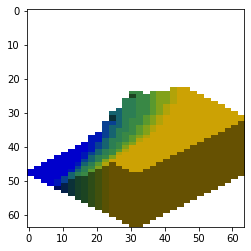

OrderedDict([('TileName', 'D26'), ('XCoord', '2'), ('YCoord', '6'), ('SolidFlags', 'BEU+BSD'), ('EdgeUp', 'ECOR_LEFTN'), ('EdgeDown', 'SOLID'), ('EdgeLeft', 'SCOR_UPN'), ('EdgeRight', 'HALF_DOWN'), ('Fill', '65'), ('Comment', 'Open Corners')])


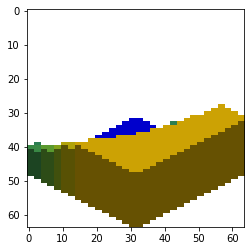

OrderedDict([('TileName', 'D27'), ('XCoord', '0'), ('YCoord', '4'), ('SolidFlags', 'BER+BSL'), ('EdgeUp', 'HALF_LEFT'), ('EdgeDown', 'SCOR_RIGHTN'), ('EdgeLeft', 'SOLID'), ('EdgeRight', 'ECOR_DOWNN'), ('Fill', '65'), ('Comment', 'Open Corners')])


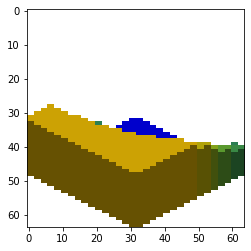

OrderedDict([('TileName', 'D28'), ('XCoord', '0'), ('YCoord', '2'), ('SolidFlags', 'BER+BSL'), ('EdgeUp', 'SCOR_RIGHTN'), ('EdgeDown', 'HALF_LEFT'), ('EdgeLeft', 'SOLID'), ('EdgeRight', 'ECOR_UPN'), ('Fill', '65'), ('Comment', 'Open Corners')])


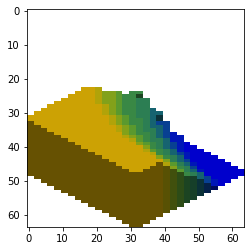

OrderedDict([('TileName', 'E1'), ('XCoord', '8'), ('YCoord', '1'), ('SolidFlags', 'BEU+BSR+BSD+BEL'), ('EdgeUp', 'ECOR_RIGHTN'), ('EdgeDown', 'SCOR_LEFTN'), ('EdgeLeft', 'ECOR_DOWNN'), ('EdgeRight', 'SCOR_UPN'), ('Fill', '50'), ('Comment', 'Oblique Tiles')])


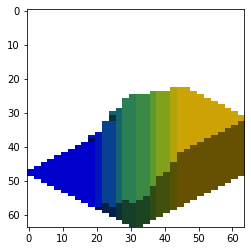

OrderedDict([('TileName', 'E2'), ('XCoord', '12'), ('YCoord', '1'), ('SolidFlags', 'BEU+BER+BSD+BSL'), ('EdgeUp', 'ECOR_LEFTN'), ('EdgeDown', 'SCOR_RIGHTN'), ('EdgeLeft', 'SCOR_UPN'), ('EdgeRight', 'ECOR_DOWNN'), ('Fill', '50'), ('Comment', 'Oblique Tiles')])


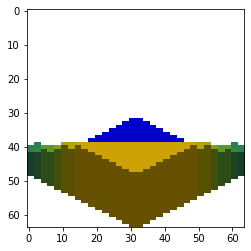

OrderedDict([('TileName', 'E3'), ('XCoord', '12'), ('YCoord', '5'), ('SolidFlags', 'BSU+BER+BED+BSL'), ('EdgeUp', 'SCOR_RIGHTN'), ('EdgeDown', 'ECOR_LEFTN'), ('EdgeLeft', 'SCOR_DOWNN'), ('EdgeRight', 'ECOR_UPN'), ('Fill', '50'), ('Comment', 'Oblique Tiles')])


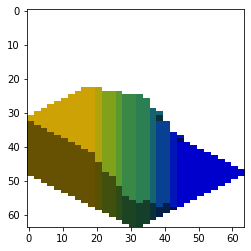

OrderedDict([('TileName', 'E4'), ('XCoord', '8'), ('YCoord', '5'), ('SolidFlags', 'BSU+BSR+BED+BEL'), ('EdgeUp', 'SCOR_LEFTN'), ('EdgeDown', 'ECOR_RIGHTN'), ('EdgeLeft', 'ECOR_UPN'), ('EdgeRight', 'SCOR_DOWNN'), ('Fill', '50'), ('Comment', 'Oblique Tiles')])


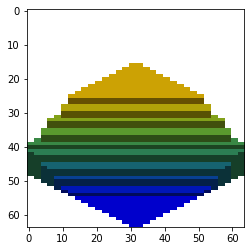

OrderedDict([('TileName', 'F11'), ('XCoord', '12'), ('YCoord', '6'), ('SolidFlags', 'BE+BEU+BED+BER+BEL'), ('EdgeUp', 'ECOR_LEFTT'), ('EdgeDown', 'EMPTY'), ('EdgeLeft', 'ECOR_UPT'), ('EdgeRight', 'EMPTY'), ('Fill', '5'), ('Comment', 'Oblique Tiles')])


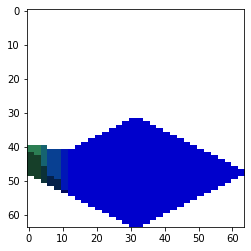

OrderedDict([('TileName', 'F12'), ('XCoord', '8'), ('YCoord', '6'), ('SolidFlags', 'BE+BEU+BED+BER+BEL'), ('EdgeUp', 'ECOR_RIGHTT'), ('EdgeDown', 'EMPTY'), ('EdgeLeft', 'EMPTY'), ('EdgeRight', 'ECOR_UPT'), ('Fill', '5'), ('Comment', 'Oblique Tiles')])


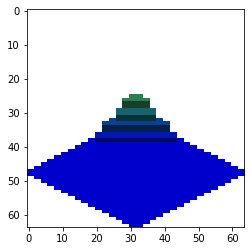

OrderedDict([('TileName', 'F13'), ('XCoord', '8'), ('YCoord', '0'), ('SolidFlags', 'BE+BEU+BED+BER+BEL'), ('EdgeUp', 'EMPTY'), ('EdgeDown', 'ECOR_RIGHTT'), ('EdgeLeft', 'EMPTY'), ('EdgeRight', 'ECOR_DOWNT'), ('Fill', '5'), ('Comment', 'Oblique Tiles')])


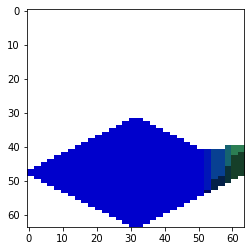

OrderedDict([('TileName', 'F14'), ('XCoord', '12'), ('YCoord', '0'), ('SolidFlags', 'BE+BEU+BED+BER+BEL'), ('EdgeUp', 'EMPTY'), ('EdgeDown', 'ECOR_LEFTT'), ('EdgeLeft', 'ECOR_DOWNT'), ('EdgeRight', 'EMPTY'), ('Fill', '5'), ('Comment', 'Oblique Tiles')])


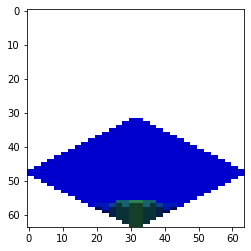

OrderedDict([('TileName', 'F15'), ('XCoord', '2'), ('YCoord', '9'), ('SolidFlags', 'BE+BEU+BED+BER+BEL'), ('EdgeUp', 'ECOR_LEFTT'), ('EdgeDown', 'ECOR_RIGHTT'), ('EdgeLeft', 'ECOR_UPT'), ('EdgeRight', 'ECOR_DOWNT'), ('Fill', '10'), ('Comment', 'Oblique Tiles')])


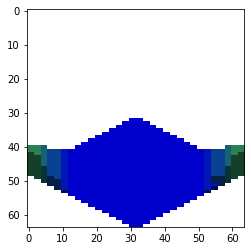

OrderedDict([('TileName', 'F16'), ('XCoord', '4'), ('YCoord', '9'), ('SolidFlags', 'BE+BEU+BED+BER+BEL'), ('EdgeUp', 'ECOR_RIGHTT'), ('EdgeDown', 'ECOR_LEFTT'), ('EdgeLeft', 'ECOR_DOWNT'), ('EdgeRight', 'ECOR_UPT'), ('Fill', '10'), ('Comment', 'Oblique Tiles')])


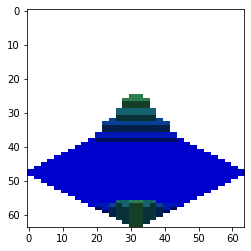

OrderedDict([('TileName', 'F21'), ('XCoord', '8'), ('YCoord', '2'), ('SolidFlags', 'BS+BSU+BSD+BSR+BSL'), ('EdgeUp', 'SCOR_LEFTT'), ('EdgeDown', 'SOLID'), ('EdgeLeft', 'SCOR_UPT'), ('EdgeRight', 'SOLID'), ('Fill', '95'), ('Comment', 'Oblique Tiles')])


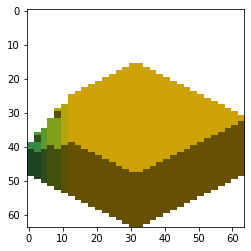

OrderedDict([('TileName', 'F22'), ('XCoord', '12'), ('YCoord', '2'), ('SolidFlags', 'BS+BSU+BSD+BSR+BSL'), ('EdgeUp', 'SCOR_RIGHTT'), ('EdgeDown', 'SOLID'), ('EdgeLeft', 'SOLID'), ('EdgeRight', 'SCOR_UPT'), ('Fill', '95'), ('Comment', 'Oblique Tiles')])


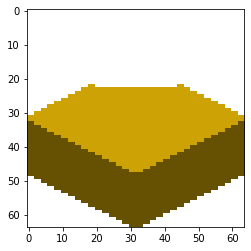

OrderedDict([('TileName', 'F23'), ('XCoord', '12'), ('YCoord', '4'), ('SolidFlags', 'BS+BSU+BSD+BSR+BSL'), ('EdgeUp', 'SOLID'), ('EdgeDown', 'SCOR_RIGHTT'), ('EdgeLeft', 'SOLID'), ('EdgeRight', 'SCOR_DOWNT'), ('Fill', '95'), ('Comment', 'Oblique Tiles')])


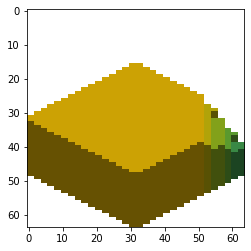

OrderedDict([('TileName', 'F24'), ('XCoord', '8'), ('YCoord', '4'), ('SolidFlags', 'BS+BSU+BSD+BSR+BSL'), ('EdgeUp', 'SOLID'), ('EdgeDown', 'SCOR_LEFTT'), ('EdgeLeft', 'SCOR_DOWNT'), ('EdgeRight', 'SOLID'), ('Fill', '95'), ('Comment', 'Oblique Tiles')])


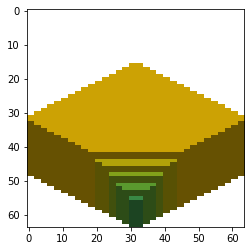

OrderedDict([('TileName', 'F25'), ('XCoord', '9'), ('YCoord', '9'), ('SolidFlags', 'BS+BSU+BSD+BSR+BSL'), ('EdgeUp', 'SCOR_LEFTT'), ('EdgeDown', 'SCOR_RIGHTT'), ('EdgeLeft', 'SCOR_UPT'), ('EdgeRight', 'SCOR_DOWNT'), ('Fill', '90'), ('Comment', 'Oblique Tiles')])


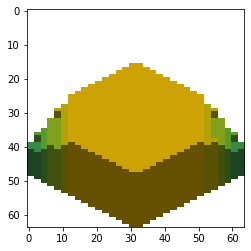

OrderedDict([('TileName', 'F26'), ('XCoord', '11'), ('YCoord', '9'), ('SolidFlags', 'BS+BSU+BSD+BSR+BSL'), ('EdgeUp', 'SCOR_RIGHTT'), ('EdgeDown', 'SCOR_LEFTT'), ('EdgeLeft', 'SCOR_DOWNT'), ('EdgeRight', 'SCOR_UPT'), ('Fill', '90'), ('Comment', 'Oblique Tiles')])


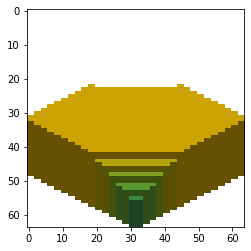

OrderedDict([('TileName', 'G11'), ('XCoord', '17'), ('YCoord', '7'), ('SolidFlags', 'BEU+BER+BEL'), ('EdgeUp', 'EMPTY'), ('EdgeDown', 'HCOR_LEFTN'), ('EdgeLeft', 'ECOR_DOWNN'), ('EdgeRight', 'EMPTY'), ('Fill', '15'), ('Comment', 'Close Corners')])


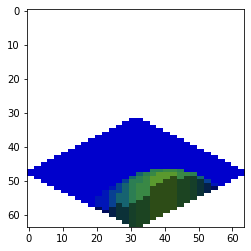

OrderedDict([('TileName', 'G12'), ('XCoord', '18'), ('YCoord', '7'), ('SolidFlags', 'BEU+BER+BEL'), ('EdgeUp', 'EMPTY'), ('EdgeDown', 'HCOR_RIGHTN'), ('EdgeLeft', 'EMPTY'), ('EdgeRight', 'ECOR_DOWNN'), ('Fill', '15'), ('Comment', 'Close Corners')])


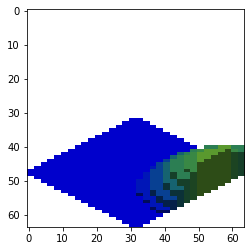

OrderedDict([('TileName', 'G13'), ('XCoord', '13'), ('YCoord', '10'), ('SolidFlags', 'BER+BED+BEU'), ('EdgeUp', 'ECOR_LEFTN'), ('EdgeDown', 'EMPTY'), ('EdgeLeft', 'HCOR_UPN'), ('EdgeRight', 'EMPTY'), ('Fill', '15'), ('Comment', 'Close Corners')])


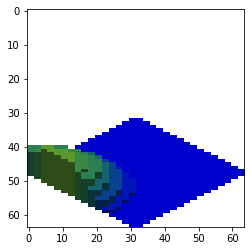

OrderedDict([('TileName', 'G14'), ('XCoord', '13'), ('YCoord', '11'), ('SolidFlags', 'BER+BED+BEU'), ('EdgeUp', 'EMPTY'), ('EdgeDown', 'ECOR_LEFTN'), ('EdgeLeft', 'HCOR_DOWNN'), ('EdgeRight', 'EMPTY'), ('Fill', '15'), ('Comment', 'Close Corners')])


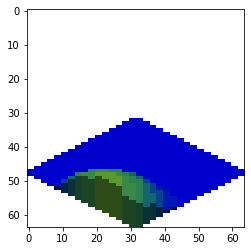

OrderedDict([('TileName', 'G15'), ('XCoord', '18'), ('YCoord', '13'), ('SolidFlags', 'BED+BEL+BER'), ('EdgeUp', 'HCOR_RIGHTN'), ('EdgeDown', 'EMPTY'), ('EdgeLeft', 'EMPTY'), ('EdgeRight', 'ECOR_UPN'), ('Fill', '15'), ('Comment', 'Close Corners')])


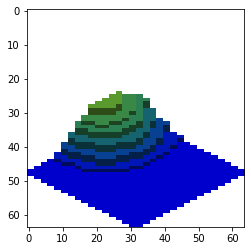

OrderedDict([('TileName', 'G16'), ('XCoord', '17'), ('YCoord', '13'), ('SolidFlags', 'BED+BEL+BER'), ('EdgeUp', 'HCOR_LEFTN'), ('EdgeDown', 'EMPTY'), ('EdgeLeft', 'ECOR_UPN'), ('EdgeRight', 'EMPTY'), ('Fill', '15'), ('Comment', 'Close Corners')])


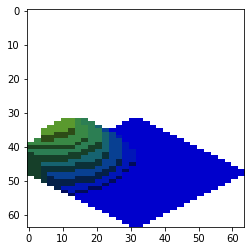

OrderedDict([('TileName', 'G17'), ('XCoord', '7'), ('YCoord', '11'), ('SolidFlags', 'BEL+BEU+BED'), ('EdgeUp', 'EMPTY'), ('EdgeDown', 'HCOR_RIGHTN'), ('EdgeLeft', 'EMPTY'), ('EdgeRight', 'SCOR_DOWNN'), ('Fill', '15'), ('Comment', 'Close Corners')])


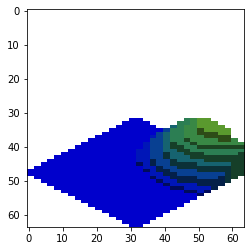

OrderedDict([('TileName', 'G18'), ('XCoord', '7'), ('YCoord', '10'), ('SolidFlags', 'BEL+BEU+BED'), ('EdgeUp', 'HCOR_RIGHTN'), ('EdgeDown', 'EMPTY'), ('EdgeLeft', 'EMPTY'), ('EdgeRight', 'SCOR_UPN'), ('Fill', '15'), ('Comment', 'Close Corners')])


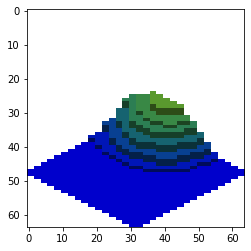

OrderedDict([('TileName', 'G21'), ('XCoord', '17'), ('YCoord', '0'), ('SolidFlags', 'BSU+BSR+BSL'), ('EdgeUp', 'SOLID'), ('EdgeDown', 'OCOR_LEFTN'), ('EdgeLeft', 'SCOR_DOWNN'), ('EdgeRight', 'SOLID'), ('Fill', '85'), ('Comment', 'Close Corners')])


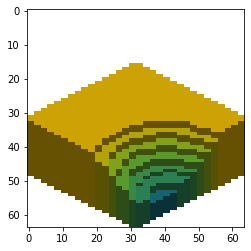

OrderedDict([('TileName', 'G22'), ('XCoord', '18'), ('YCoord', '0'), ('SolidFlags', 'BSU+BSR+BSL'), ('EdgeUp', 'SOLID'), ('EdgeDown', 'OCOR_RIGHTN'), ('EdgeLeft', 'SOLID'), ('EdgeRight', 'SCOR_DOWNN'), ('Fill', '85'), ('Comment', 'Close Corners')])


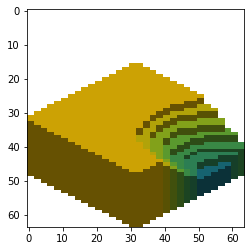

OrderedDict([('TileName', 'G23'), ('XCoord', '6'), ('YCoord', '10'), ('SolidFlags', 'BSR+BSD+BSU'), ('EdgeUp', 'SCOR_LEFTN'), ('EdgeDown', 'SOLID'), ('EdgeLeft', 'OCOR_UPN'), ('EdgeRight', 'SOLID'), ('Fill', '85'), ('Comment', 'Close Corners')])


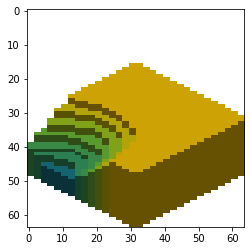

OrderedDict([('TileName', 'G24'), ('XCoord', '6'), ('YCoord', '11'), ('SolidFlags', 'BSR+BSD+BSU'), ('EdgeUp', 'SOLID'), ('EdgeDown', 'SCOR_LEFTN'), ('EdgeLeft', 'OCOR_DOWNN'), ('EdgeRight', 'SOLID'), ('Fill', '85'), ('Comment', 'Close Corners')])


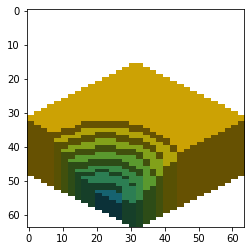

OrderedDict([('TileName', 'G25'), ('XCoord', '18'), ('YCoord', '6'), ('SolidFlags', 'BSD+BSL+BSR'), ('EdgeUp', 'OCOR_RIGHTN'), ('EdgeDown', 'SOLID'), ('EdgeLeft', 'SOLID'), ('EdgeRight', 'SCOR_UPN'), ('Fill', '85'), ('Comment', 'Close Corners')])


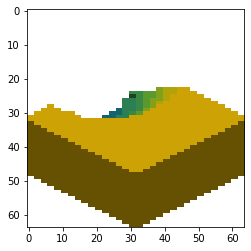

OrderedDict([('TileName', 'G26'), ('XCoord', '17'), ('YCoord', '6'), ('SolidFlags', 'BSD+BSL+BSR'), ('EdgeUp', 'OCOR_LEFTN'), ('EdgeDown', 'SOLID'), ('EdgeLeft', 'SCOR_UPN'), ('EdgeRight', 'SOLID'), ('Fill', '85'), ('Comment', 'Close Corners')])


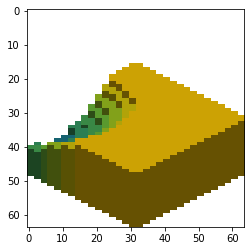

OrderedDict([('TileName', 'G27'), ('XCoord', '0'), ('YCoord', '11'), ('SolidFlags', 'BSL+BSU+BSD'), ('EdgeUp', 'SOLID'), ('EdgeDown', 'SCOR_RIGHTN'), ('EdgeLeft', 'SOLID'), ('EdgeRight', 'OCOR_DOWNN'), ('Fill', '85'), ('Comment', 'Close Corners')])


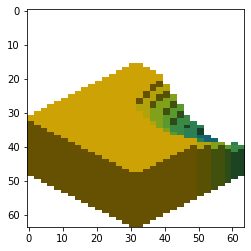

OrderedDict([('TileName', 'G28'), ('XCoord', '0'), ('YCoord', '10'), ('SolidFlags', 'BSL+BSU+BSD'), ('EdgeUp', 'SCOR_RIGHTN'), ('EdgeDown', 'SOLID'), ('EdgeLeft', 'SOLID'), ('EdgeRight', 'OCOR_UPN'), ('Fill', '85'), ('Comment', 'Close Corners')])


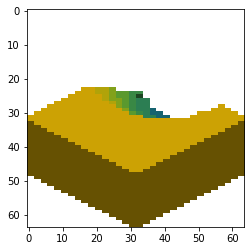

OrderedDict([('TileName', 'H11'), ('XCoord', '17'), ('YCoord', '8'), ('SolidFlags', 'BER'), ('EdgeUp', 'HCOR_LEFTT'), ('EdgeDown', 'HALF_LEFT'), ('EdgeLeft', 'SCOR_UPT'), ('EdgeRight', 'EMPTY'), ('Fill', '45'), ('Comment', 'Close Corners')])


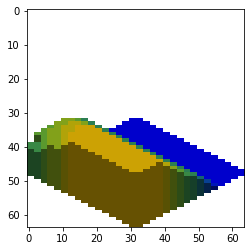

OrderedDict([('TileName', 'H12'), ('XCoord', '18'), ('YCoord', '8'), ('SolidFlags', 'BEL'), ('EdgeUp', 'HCOR_RIGHTT'), ('EdgeDown', 'HALF_RIGHT'), ('EdgeLeft', 'EMPTY'), ('EdgeRight', 'SCOR_UPT'), ('Fill', '45'), ('Comment', 'Close Corners')])


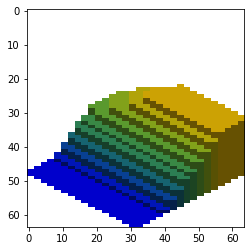

OrderedDict([('TileName', 'H13'), ('XCoord', '12'), ('YCoord', '10'), ('SolidFlags', 'BED'), ('EdgeUp', 'SCOR_RIGHTT'), ('EdgeDown', 'EMPTY'), ('EdgeLeft', 'HALF_UP'), ('EdgeRight', 'HCOR_UPT'), ('Fill', '45'), ('Comment', 'Close Corners')])


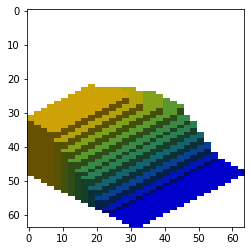

OrderedDict([('TileName', 'H14'), ('XCoord', '12'), ('YCoord', '11'), ('SolidFlags', 'BEU'), ('EdgeUp', 'EMPTY'), ('EdgeDown', 'SCOR_RIGHTT'), ('EdgeLeft', 'HALF_DOWN'), ('EdgeRight', 'HCOR_DOWNT'), ('Fill', '45'), ('Comment', 'Close Corners')])


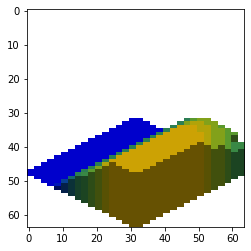

OrderedDict([('TileName', 'H15'), ('XCoord', '18'), ('YCoord', '12'), ('SolidFlags', 'BEL'), ('EdgeUp', 'HALF_RIGHT'), ('EdgeDown', 'HCOR_RIGHTT'), ('EdgeLeft', 'EMPTY'), ('EdgeRight', 'SCOR_DOWNT'), ('Fill', '45'), ('Comment', 'Close Corners')])


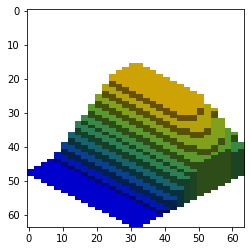

OrderedDict([('TileName', 'H16'), ('XCoord', '17'), ('YCoord', '12'), ('SolidFlags', 'BER'), ('EdgeUp', 'HALF_LEFT'), ('EdgeDown', 'HCOR_LEFTT'), ('EdgeLeft', 'SCOR_DOWNT'), ('EdgeRight', 'EMPTY'), ('Fill', '45'), ('Comment', 'Close Corners')])


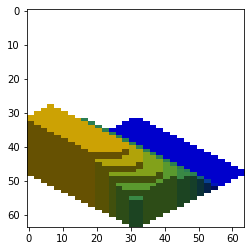

OrderedDict([('TileName', 'H17'), ('XCoord', '8'), ('YCoord', '11'), ('SolidFlags', 'BEU'), ('EdgeUp', 'EMPTY'), ('EdgeDown', 'SCOR_LEFTT'), ('EdgeLeft', 'HCOR_DOWNT'), ('EdgeRight', 'HALF_DOWN'), ('Fill', '45'), ('Comment', 'Close Corners')])


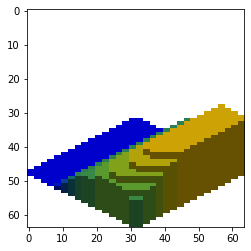

OrderedDict([('TileName', 'H18'), ('XCoord', '8'), ('YCoord', '10'), ('SolidFlags', 'BED'), ('EdgeUp', 'SCOR_LEFTT'), ('EdgeDown', 'EMPTY'), ('EdgeLeft', 'HCOR_UPT'), ('EdgeRight', 'HALF_UP'), ('Fill', '45'), ('Comment', 'Close Corners')])


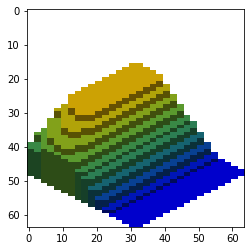

OrderedDict([('TileName', 'H21'), ('XCoord', '17'), ('YCoord', '1'), ('SolidFlags', 'BSR'), ('EdgeUp', 'OCOR_LEFTT'), ('EdgeDown', 'HALF_RIGHT'), ('EdgeLeft', 'ECOR_UPT'), ('EdgeRight', 'SOLID'), ('Fill', '55'), ('Comment', 'Close Corners')])


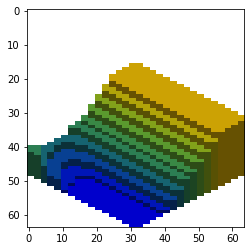

OrderedDict([('TileName', 'H22'), ('XCoord', '18'), ('YCoord', '1'), ('SolidFlags', 'BSL'), ('EdgeUp', 'OCOR_RIGHTT'), ('EdgeDown', 'HALF_LEFT'), ('EdgeLeft', 'SOLID'), ('EdgeRight', 'ECOR_UPT'), ('Fill', '55'), ('Comment', 'Close Corners')])


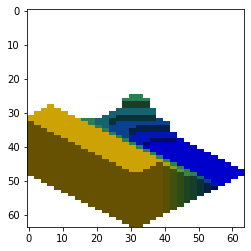

OrderedDict([('TileName', 'H23'), ('XCoord', '5'), ('YCoord', '10'), ('SolidFlags', 'BSD'), ('EdgeUp', 'ECOR_RIGHTT'), ('EdgeDown', 'SOLID'), ('EdgeLeft', 'HALF_DOWN'), ('EdgeRight', 'OCOR_UPT'), ('Fill', '55'), ('Comment', 'Close Corners')])


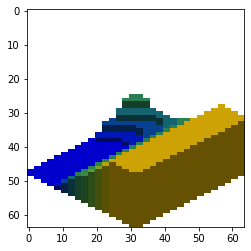

OrderedDict([('TileName', 'H24'), ('XCoord', '5'), ('YCoord', '11'), ('SolidFlags', 'BSU'), ('EdgeUp', 'SOLID'), ('EdgeDown', 'ECOR_RIGHTT'), ('EdgeLeft', 'HALF_UP'), ('EdgeRight', 'OCOR_DOWNT'), ('Fill', '55'), ('Comment', 'Close Corners')])


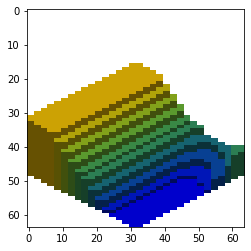

OrderedDict([('TileName', 'H25'), ('XCoord', '18'), ('YCoord', '5'), ('SolidFlags', 'BSL'), ('EdgeUp', 'HALF_LEFT'), ('EdgeDown', 'OCOR_RIGHTT'), ('EdgeLeft', 'SOLID'), ('EdgeRight', 'ECOR_DOWNT'), ('Fill', '55'), ('Comment', 'Close Corners')])


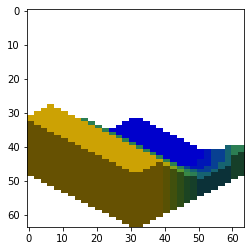

OrderedDict([('TileName', 'H26'), ('XCoord', '17'), ('YCoord', '5'), ('SolidFlags', 'BSR'), ('EdgeUp', 'HALF_RIGHT'), ('EdgeDown', 'OCOR_LEFTT'), ('EdgeLeft', 'ECOR_DOWNT'), ('EdgeRight', 'SOLID'), ('Fill', '55'), ('Comment', 'Close Corners')])


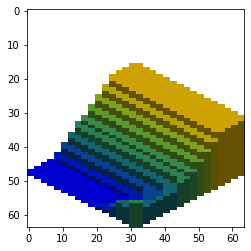

OrderedDict([('TileName', 'H27'), ('XCoord', '1'), ('YCoord', '11'), ('SolidFlags', 'BSU'), ('EdgeUp', 'SOLID'), ('EdgeDown', 'ECOR_LEFTT'), ('EdgeLeft', 'OCOR_DOWNT'), ('EdgeRight', 'HALF_UP'), ('Fill', '55'), ('Comment', 'Close Corners')])


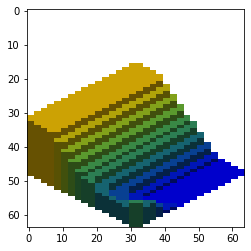

OrderedDict([('TileName', 'H28'), ('XCoord', '1'), ('YCoord', '10'), ('SolidFlags', 'BSD'), ('EdgeUp', 'ECOR_LEFTT'), ('EdgeDown', 'SOLID'), ('EdgeLeft', 'OCOR_UPT'), ('EdgeRight', 'HALF_DOWN'), ('Fill', '55'), ('Comment', 'Close Corners')])


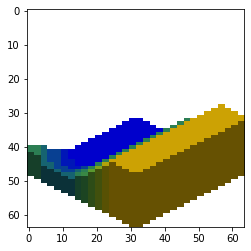

OrderedDict([('TileName', 'I11'), ('XCoord', '10'), ('YCoord', '7'), ('SolidFlags', 'BEU+BER+BSD+BEL'), ('EdgeUp', 'EMPTY'), ('EdgeDown', 'SBICORNERN'), ('EdgeLeft', 'ECOR_DOWNN'), ('EdgeRight', 'ECOR_DOWNN'), ('Fill', '20'), ('Comment', 'Oblique Corners')])


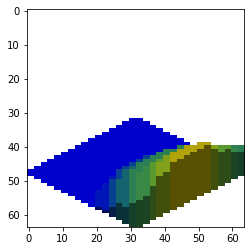

OrderedDict([('TileName', 'I12'), ('XCoord', '21'), ('YCoord', '10'), ('SolidFlags', 'BEU+BER+BED+BSL'), ('EdgeUp', 'ECOR_LEFTN'), ('EdgeDown', 'ECOR_LEFTN'), ('EdgeLeft', 'SBICORNERN'), ('EdgeRight', 'EMPTY'), ('Fill', '20'), ('Comment', 'Oblique Corners')])


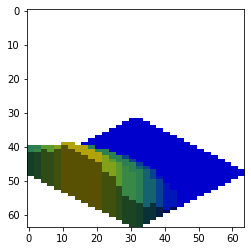

OrderedDict([('TileName', 'I13'), ('XCoord', '10'), ('YCoord', '14'), ('SolidFlags', 'BSU+BER+BED+BEL'), ('EdgeUp', 'SBICORNERN'), ('EdgeDown', 'EMPTY'), ('EdgeLeft', 'ECOR_UPN'), ('EdgeRight', 'ECOR_UPN'), ('Fill', '20'), ('Comment', 'Oblique Corners')])


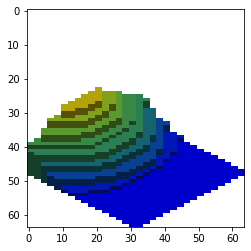

OrderedDict([('TileName', 'I14'), ('XCoord', '14'), ('YCoord', '10'), ('SolidFlags', 'BEU+BSR+BED+BEL'), ('EdgeUp', 'ECOR_RIGHTN'), ('EdgeDown', 'ECOR_RIGHTN'), ('EdgeLeft', 'EMPTY'), ('EdgeRight', 'SBICORNERN'), ('Fill', '20'), ('Comment', 'Oblique Corners')])


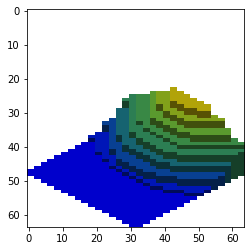

OrderedDict([('TileName', 'I21'), ('XCoord', '3'), ('YCoord', '7'), ('SolidFlags', 'BSU+BSR+BED+BSL'), ('EdgeUp', 'SOLID'), ('EdgeDown', 'EBICORNERN'), ('EdgeLeft', 'SCOR_DOWNN'), ('EdgeRight', 'SCOR_DOWNN'), ('Fill', '80'), ('Comment', 'Oblique Corners')])


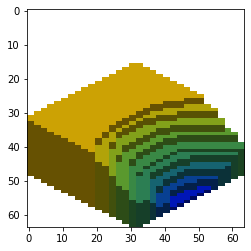

OrderedDict([('TileName', 'I22'), ('XCoord', '21'), ('YCoord', '3'), ('SolidFlags', 'BSU+BSR+BSD+BEL'), ('EdgeUp', 'SCOR_LEFTN'), ('EdgeDown', 'SCOR_LEFTN'), ('EdgeLeft', 'EBICORNERN'), ('EdgeRight', 'SOLID'), ('Fill', '80'), ('Comment', 'Oblique Corners')])


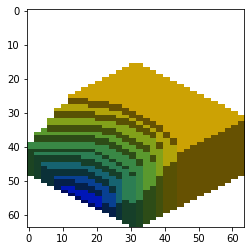

OrderedDict([('TileName', 'I23'), ('XCoord', '3'), ('YCoord', '14'), ('SolidFlags', 'BEU+BSR+BSD+BSL'), ('EdgeUp', 'EBICORNERN'), ('EdgeDown', 'SOLID'), ('EdgeLeft', 'SCOR_UPN'), ('EdgeRight', 'SCOR_UPN'), ('Fill', '80'), ('Comment', 'Oblique Corners')])


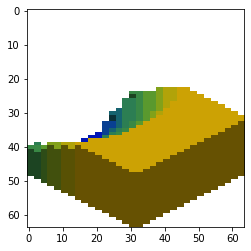

OrderedDict([('TileName', 'I24'), ('XCoord', '14'), ('YCoord', '3'), ('SolidFlags', 'BSU+BER+BSD+BSL'), ('EdgeUp', 'ECOR_RIGHTN'), ('EdgeDown', 'ECOR_RIGHTN'), ('EdgeLeft', 'SOLID'), ('EdgeRight', 'EBICORNERN'), ('Fill', '80'), ('Comment', 'Oblique Corners')])


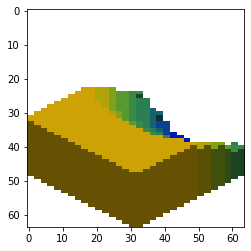

OrderedDict([('TileName', 'J11'), ('XCoord', '10'), ('YCoord', '8'), ('SolidFlags', 'BE'), ('EdgeUp', 'SBICORNERT'), ('EdgeDown', 'SOLID'), ('EdgeLeft', 'SCOR_UPT'), ('EdgeRight', 'SCOR_UPT'), ('Fill', '90'), ('Comment', 'Oblique Corners')])


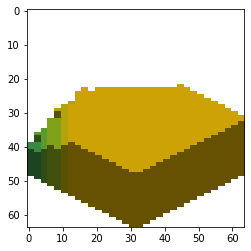

OrderedDict([('TileName', 'J12'), ('XCoord', '20'), ('YCoord', '10'), ('SolidFlags', 'BE'), ('EdgeUp', 'SCOR_RIGHTT'), ('EdgeDown', 'SCOR_RIGHTT'), ('EdgeLeft', 'SOLID'), ('EdgeRight', 'SBICORNERT'), ('Fill', '90'), ('Comment', 'Oblique Corners')])


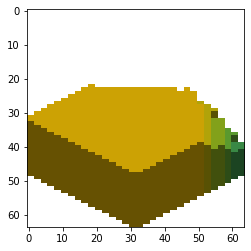

OrderedDict([('TileName', 'J13'), ('XCoord', '10'), ('YCoord', '13'), ('SolidFlags', 'BE'), ('EdgeUp', 'SOLID'), ('EdgeDown', 'SBICORNERT'), ('EdgeLeft', 'SCOR_DOWNT'), ('EdgeRight', 'SCOR_DOWNT'), ('Fill', '90'), ('Comment', 'Oblique Corners')])


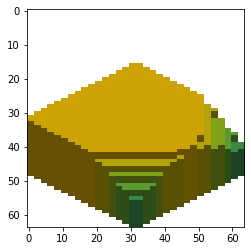

OrderedDict([('TileName', 'J14'), ('XCoord', '15'), ('YCoord', '10'), ('SolidFlags', 'BE'), ('EdgeUp', 'SCOR_LEFTT'), ('EdgeDown', 'SCOR_LEFTT'), ('EdgeLeft', 'SBICORNERT'), ('EdgeRight', 'SOLID'), ('Fill', '90'), ('Comment', 'Oblique Corners')])


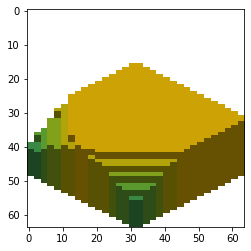

OrderedDict([('TileName', 'J21'), ('XCoord', '3'), ('YCoord', '8'), ('SolidFlags', 'BS'), ('EdgeUp', 'EBICORNERT'), ('EdgeDown', 'EMPTY'), ('EdgeLeft', 'ECOR_UPT'), ('EdgeRight', 'ECOR_UPT'), ('Fill', '10'), ('Comment', 'Oblique Corners')])


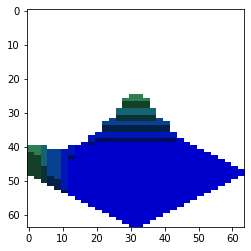

OrderedDict([('TileName', 'J22'), ('XCoord', '20'), ('YCoord', '3'), ('SolidFlags', 'BS'), ('EdgeUp', 'ECOR_RIGHTT'), ('EdgeDown', 'ECOR_RIGHTT'), ('EdgeLeft', 'EMPTY'), ('EdgeRight', 'EBICORNERT'), ('Fill', '10'), ('Comment', 'Oblique Corners')])


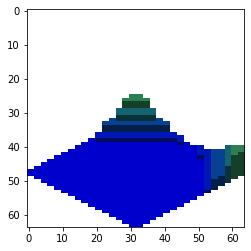

OrderedDict([('TileName', 'J23'), ('XCoord', '3'), ('YCoord', '13'), ('SolidFlags', 'BS'), ('EdgeUp', 'EMPTY'), ('EdgeDown', 'EBICORNERT'), ('EdgeLeft', 'ECOR_DOWNT'), ('EdgeRight', 'ECOR_DOWNT'), ('Fill', '10'), ('Comment', 'Oblique Corners')])


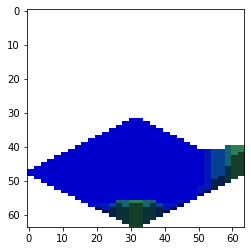

OrderedDict([('TileName', 'J24'), ('XCoord', '15'), ('YCoord', '3'), ('SolidFlags', 'BS'), ('EdgeUp', 'ECOR_LEFTT'), ('EdgeDown', 'ECOR_LEFTT'), ('EdgeLeft', 'EBICORNERT'), ('EdgeRight', 'EMPTY'), ('Fill', '10'), ('Comment', 'Oblique Corners')])


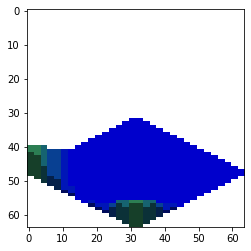

OrderedDict([('TileName', 'K1'), ('XCoord', '4'), ('YCoord', '16'), ('SolidFlags', 'BE'), ('EdgeUp', 'EBICORNERT'), ('EdgeDown', 'EBICORNERT'), ('EdgeLeft', 'EBICORNERT'), ('EdgeRight', 'EBICORNERT'), ('Fill', '80'), ('Comment', 'Singularities')])


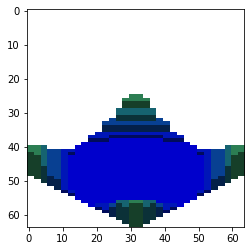

OrderedDict([('TileName', 'K2'), ('XCoord', '1'), ('YCoord', '16'), ('SolidFlags', 'BS'), ('EdgeUp', 'SBICORNERT'), ('EdgeDown', 'SBICORNERT'), ('EdgeLeft', 'SBICORNERT'), ('EdgeRight', 'SBICORNERT'), ('Fill', '20'), ('Comment', 'Singularities')])


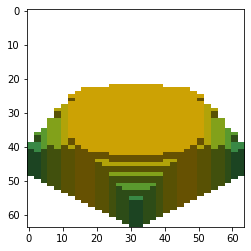

OrderedDict([('TileName', 'L11'), ('XCoord', '23'), ('YCoord', '1'), ('SolidFlags', 'BSD'), ('EdgeUp', 'EBICORNERT'), ('EdgeDown', 'SOLID'), ('EdgeLeft', 'OCOR_UPT'), ('EdgeRight', 'OCOR_UPT'), ('Fill', '60'), ('Comment', 'Singularities')])


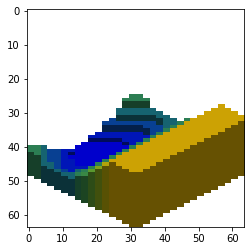

OrderedDict([('TileName', 'L12'), ('XCoord', '12'), ('YCoord', '16'), ('SolidFlags', 'BSL'), ('EdgeUp', 'OCOR_RIGHTT'), ('EdgeDown', 'OCOR_RIGHTT'), ('EdgeLeft', 'SOLID'), ('EdgeRight', 'EBICORNERT'), ('Fill', '60'), ('Comment', 'Singularities')])


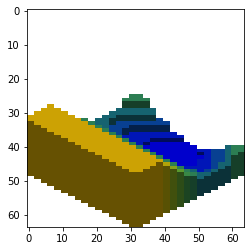

OrderedDict([('TileName', 'L13'), ('XCoord', '23'), ('YCoord', '2'), ('SolidFlags', 'BSU'), ('EdgeUp', 'SOLID'), ('EdgeDown', 'EBICORNERT'), ('EdgeLeft', 'OCOR_DOWNT'), ('EdgeRight', 'OCOR_DOWNT'), ('Fill', '60'), ('Comment', 'Singularities')])


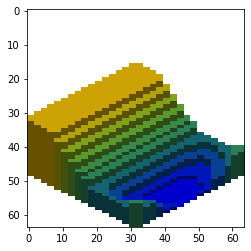

OrderedDict([('TileName', 'L14'), ('XCoord', '11'), ('YCoord', '16'), ('SolidFlags', 'BSR'), ('EdgeUp', 'OCOR_LEFTT'), ('EdgeDown', 'OCOR_LEFTT'), ('EdgeLeft', 'EBICORNERT'), ('EdgeRight', 'SOLID'), ('Fill', '60'), ('Comment', 'Singularities')])


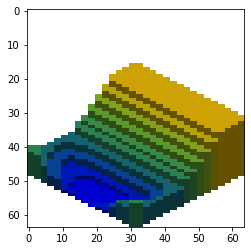

OrderedDict([('TileName', 'L21'), ('XCoord', '23'), ('YCoord', '5'), ('SolidFlags', 'BED'), ('EdgeUp', 'SBICORNERT'), ('EdgeDown', 'EMPTY'), ('EdgeLeft', 'HCOR_UPT'), ('EdgeRight', 'HCOR_UPT'), ('Fill', '40'), ('Comment', 'Singularities')])


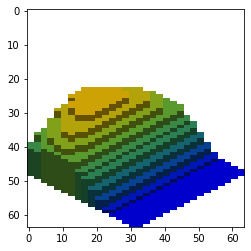

OrderedDict([('TileName', 'L22'), ('XCoord', '8'), ('YCoord', '16'), ('SolidFlags', 'BEL'), ('EdgeUp', 'HCOR_RIGHTT'), ('EdgeDown', 'HCOR_RIGHTT'), ('EdgeLeft', 'EMPTY'), ('EdgeRight', 'SBICORNERT'), ('Fill', '40'), ('Comment', 'Singularities')])


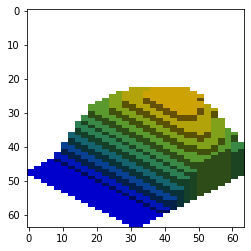

OrderedDict([('TileName', 'L23'), ('XCoord', '23'), ('YCoord', '6'), ('SolidFlags', 'BEU'), ('EdgeUp', 'EMPTY'), ('EdgeDown', 'SBICORNERT'), ('EdgeLeft', 'HCOR_DOWNT'), ('EdgeRight', 'HCOR_DOWNT'), ('Fill', '40'), ('Comment', 'Singularities')])


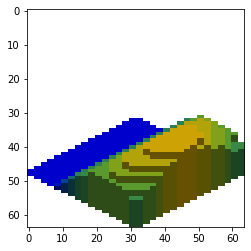

OrderedDict([('TileName', 'L24'), ('XCoord', '7'), ('YCoord', '16'), ('SolidFlags', 'BER'), ('EdgeUp', 'HCOR_LEFTT'), ('EdgeDown', 'HCOR_LEFTT'), ('EdgeLeft', 'SBICORNERT'), ('EdgeRight', 'EMPTY'), ('Fill', '40'), ('Comment', 'Singularities')])


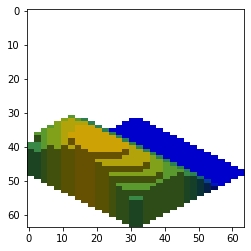

In [46]:
for tile_info in tiles_info:
    print(tile_info)
    img = convert_tile(int(tile_info['XCoord']), int(tile_info['YCoord']))
    plt.imshow(img)
    plt.show()